<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head(), df.shape

(     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
 0  5524        1957  Graduation         Single  58138.0        0         0   
 1  2174        1954  Graduation         Single  46344.0        1         1   
 2  4141        1965  Graduation       Together  71613.0        0         0   
 3  6182        1984  Graduation       Together  26646.0        1         0   
 4  5324        1981         PhD        Married  58293.0        1         0   
 
   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
 0  04-09-2012       58       635  ...                  7             0   
 1  08-03-2014       38        11  ...                  5             0   
 2  21-08-2013       26       426  ...                  4             0   
 3  10-02-2014       26        11  ...                  6             0   
 4  19-01-2014       94       173  ...                  5             0   
 
    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \


In [3]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
df.info()
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [5]:
df['Income'] = df['Income'].fillna(df['Income'].median())

Заповнюємо `Income` медіаною, бо:

вона стійка до викидів (на відміну від середнього),

не потребує видалення даних, оскільки дана колонка важлива для подальшої сегментації клієнтів.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [6]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [7]:
# Обробка Education
education_mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
df['Education'] = df['Education'].map(education_mapping)

In [8]:
# Обробка Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Days'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

In [9]:
# Обробка Marital_Status
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

In [10]:
# Видалення неінформативних колонок
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [11]:
# from scipy.stats import skew

# # Обчислення коефіцієнтів асиметрії (skewness)
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# skewness_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))
# skewed_features = skewness_values[skewness_values > 1].sort_values(ascending=False)

# # Побудова графіка для візуалізації
# plt.figure(figsize=(10, 6))
# sns.barplot(x=skewed_features.values, y=skewed_features.index, palette="viridis")
# plt.title("Ознаки з високим перекосом (skewness > 1)")
# plt.xlabel("Коефіцієнт асиметрії")
# plt.ylabel("Назва ознаки")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# skewed_features

In [12]:
# # Список ознак, які потрібно логарифмувати
# log_features = [
#     'Income', 'MntMeatProducts', 'MntSweetProducts', 'MntFruits',
#     'MntFishProducts', 'MntGoldProds', 'NumCatalogPurchases',
#     'NumWebPurchases', 'MntWines', 'Customer_Days'
# ]

# df_log_scaled = df.copy()

# for col in log_features:
#     df_log_scaled[col] = np.log1p(df_log_scaled[col])

# # Масштабування всіх числових ознак
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled_final = pd.DataFrame(scaler.fit_transform(df_log_scaled), columns=df_log_scaled.columns)

# df_scaled_final.head(10)


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [13]:
X_unscaled = df.copy()

# Кластеризація
kmeans_unscaled = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels_unscaled = kmeans_unscaled.fit_predict(X_unscaled)

In [14]:
# Оцінка за метрикою силуету
silhouette_unscaled = silhouette_score(X_unscaled, labels_unscaled, metric='euclidean')
print("Силует-коефіцієнт (без масштабування):", silhouette_unscaled)

Силует-коефіцієнт (без масштабування): 0.5378509655656586


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [15]:
X_with_labels = X_unscaled.copy()
X_with_labels['Cluster'] = labels_unscaled

# Побудова 3D-графіка
import plotly.express as px
fig = px.scatter_3d(
    X_with_labels,
    x='Income',
    y='NumWebPurchases',
    z='MntWines',
    color='Cluster',
    title="3D-візуалізація кластерів: дохід, онлайн-покупки, витрати на вино",
    opacity=0.7
)
fig.update_traces(marker=dict(size=5))
fig.show()

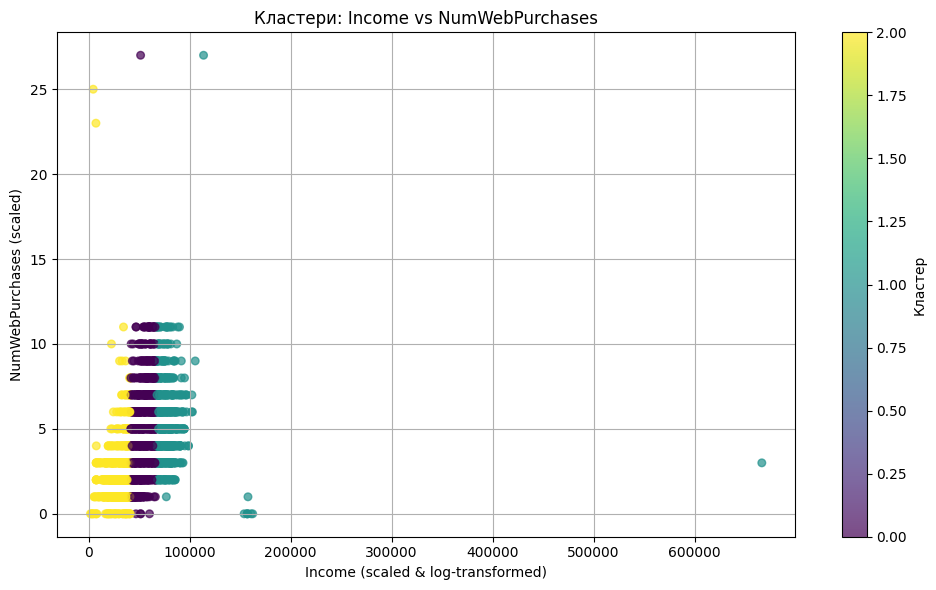

In [16]:
# Побудова 2D-графіку для ознак: Income vs NumWebPurchases
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_with_labels['Income'],
    X_with_labels['NumWebPurchases'],
    c=X_with_labels['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.7
)
plt.title("Кластери: Income vs NumWebPurchases")
plt.xlabel("Income (scaled & log-transformed)")
plt.ylabel("NumWebPurchases (scaled)")
plt.colorbar(scatter, label='Кластер')
plt.grid(True)
plt.tight_layout()
plt.show()


Один кластер чітко охоплює клієнтів із вищим доходом та більшою онлайн-активністю.

Інший кластер — з меншим доходом або меншою кількістю онлайн-покупок.

Третій — середній сегмент або змішаний профіль (наприклад, помірний дохід, але часті покупки).

Це підтверджує наявність значущої сегментації за доходом та поведінкою.

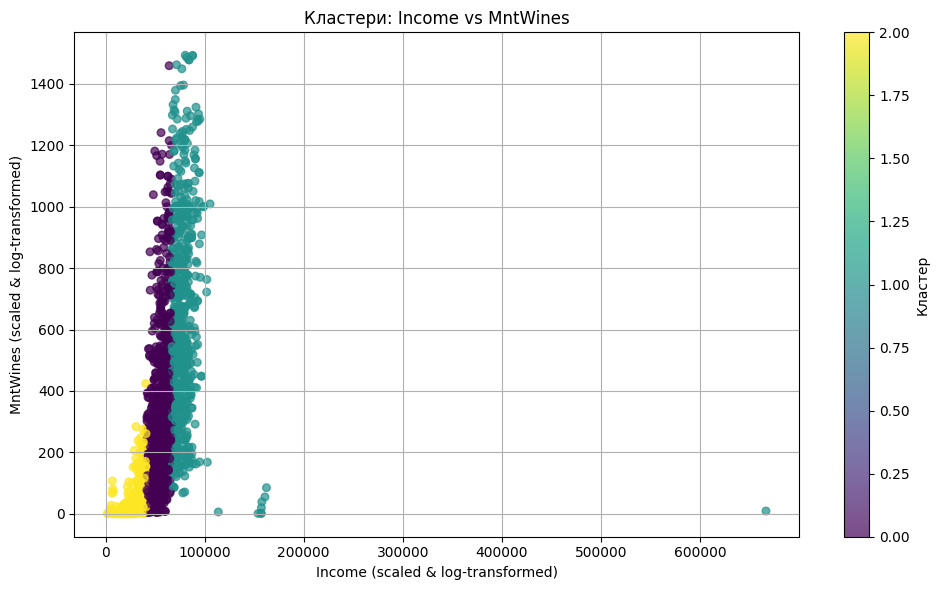

In [17]:
# Побудова 2D-графіку для конкретних ознак: Income vs MntWines
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_with_labels['Income'],
    X_with_labels['MntWines'],
    c=X_with_labels['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.7
)
plt.title("Кластери: Income vs MntWines")
plt.xlabel("Income (scaled & log-transformed)")
plt.ylabel("MntWines (scaled & log-transformed)")
plt.colorbar(scatter, label='Кластер')
plt.grid(True)
plt.tight_layout()
plt.show()


Один кластер чітко виділяється — високий дохід, велика кількість онлайн-покупок і витрати на вино.

Завдання 6. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [18]:
from sklearn.preprocessing import StandardScaler

# Масштабування даних
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=X_unscaled.columns)

kmeans_scaled = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

silhouette_scaled = silhouette_score(X_scaled, labels_scaled, metric='euclidean')
print("Силует-коефіцієнт (після масштабування):", silhouette_scaled)


Силует-коефіцієнт (після масштабування): 0.20063684776288096


Після масштабування якість кластеризації погіршилася: силует суттєво знизився.

Природні масштаби ознак були інформативнішими для сегментації.

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

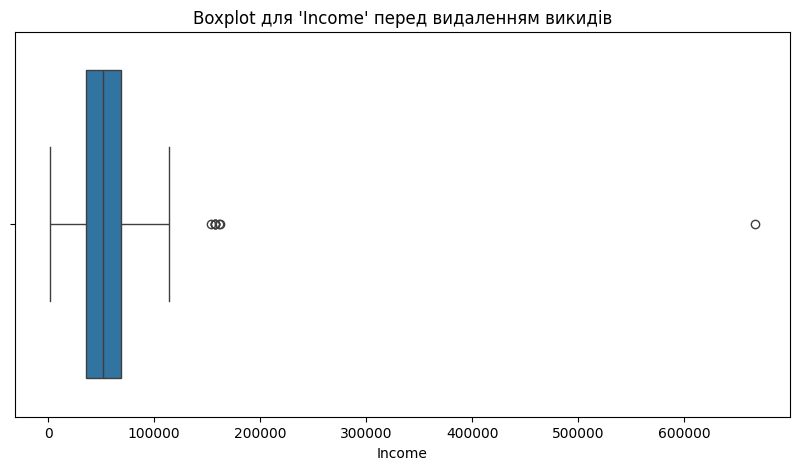

Рядків до видалення викидів: 2240
Рядків після видалення викидів: 2232
Видалено рядків: 8


In [19]:
# Візуалізація розподілу значень Income
plt.figure(figsize=(10, 5))
sns.boxplot(x=X_unscaled['Income'])
plt.title("Boxplot для 'Income' перед видаленням викидів")
plt.show()

# Обчислення меж IQR
Q1 = X_unscaled['Income'].quantile(0.25)
Q3 = X_unscaled['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фільтрація рядків без викидів
X_no_outliers = X_unscaled[(X_unscaled['Income'] >= lower_bound) & (X_unscaled['Income'] <= upper_bound)]

# Підрахунок змін
rows_before = X_unscaled.shape[0]
rows_after = X_no_outliers.shape[0]
rows_removed = rows_before - rows_after

print(f"Рядків до видалення викидів: {rows_before}")
print(f"Рядків після видалення викидів: {rows_after}")
print(f"Видалено рядків: {rows_removed}")


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

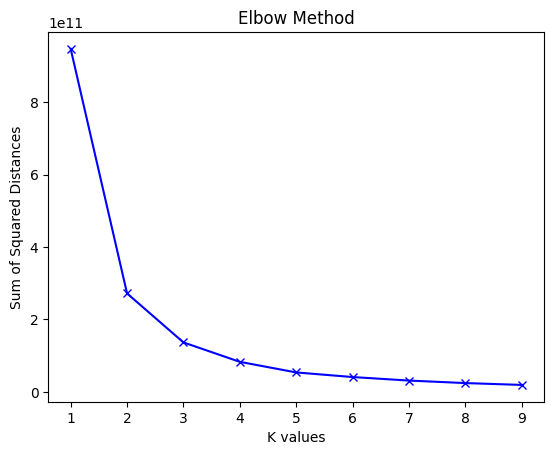

In [25]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_no_outliers)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [26]:
kmeans_no_outliers = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels_no_outliers = kmeans_scaled.fit_predict(X_no_outliers)

silhouette_no_outliers = silhouette_score(X_no_outliers, labels_no_outliers, metric='euclidean')
print("Силует-коефіцієнт (після без викидів):", silhouette_no_outliers)

Силует-коефіцієнт (після без викидів): 0.5516987209927207


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

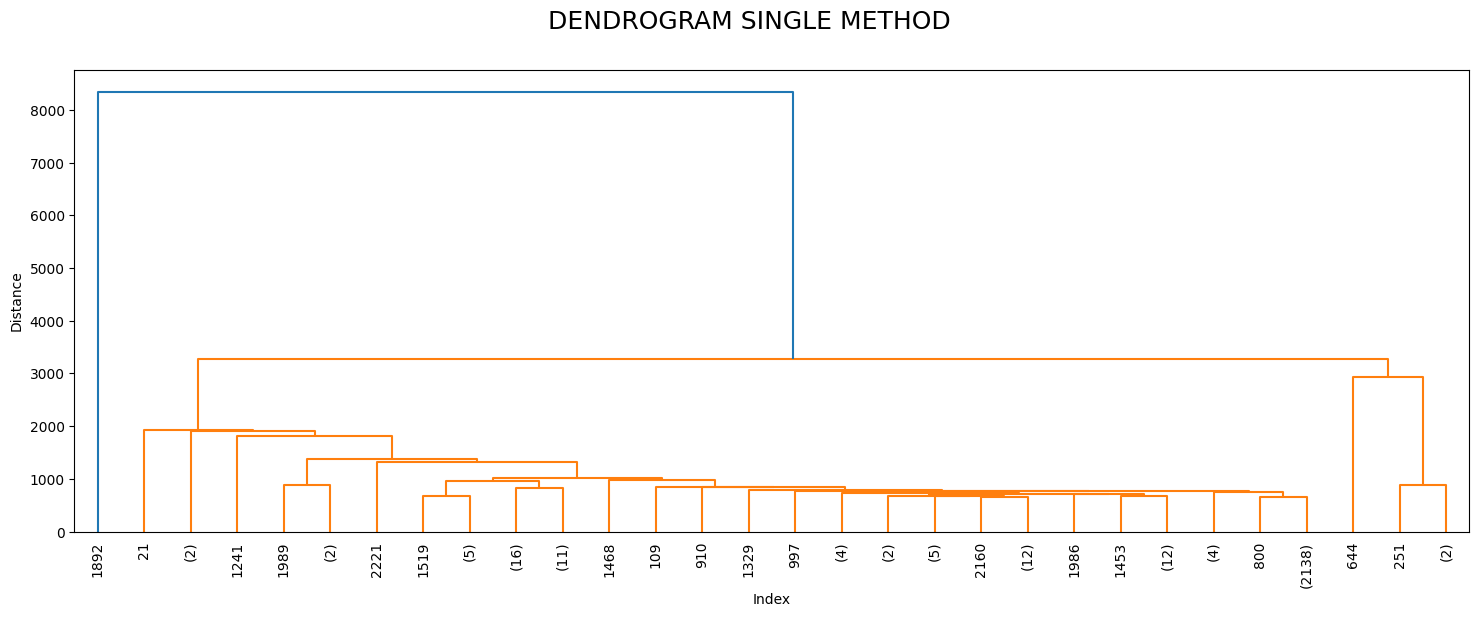

In [28]:
dist_sin = linkage(X_no_outliers, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [34]:
# Плоска кластеризація на 2 та 3 кластери
clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

X_labeled = X_no_outliers.copy()
X_labeled['2_clust'] = clusters_2
X_labeled['3_clust'] = clusters_3

In [35]:
X_labeled.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Customer_Days,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,2_clust,3_clust
0,1957,2,58138.0,0,0,58,635,88,546,172,...,663,False,False,False,True,False,False,False,1,1
1,1954,2,46344.0,1,1,38,11,1,6,2,...,113,False,False,False,True,False,False,False,1,1
2,1965,2,71613.0,0,0,26,426,49,127,111,...,312,False,False,False,False,True,False,False,1,1
3,1984,2,26646.0,1,0,26,11,4,20,10,...,139,False,False,False,False,True,False,False,1,1
4,1981,4,58293.0,1,0,94,173,43,118,46,...,161,False,False,True,False,False,False,False,1,1


In [36]:
import plotly.express as px

# К=2
fig_2d_both_2 = px.scatter(
    X_labeled,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled['2_clust'].astype(str),
    title="Flat Clustering (fcluster) with 2 Clusters - Single Linkage",
    labels={"color": "2_clust"}
)

# К=3
fig_2d_both_3 = px.scatter(
    X_labeled,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled['3_clust'].astype(str),
    title="Flat Clustering (fcluster) with 3 Clusters - Single Linkage",
    labels={"color": "3_clust"}
)

fig_2d_both_2.show()
fig_2d_both_3.show()

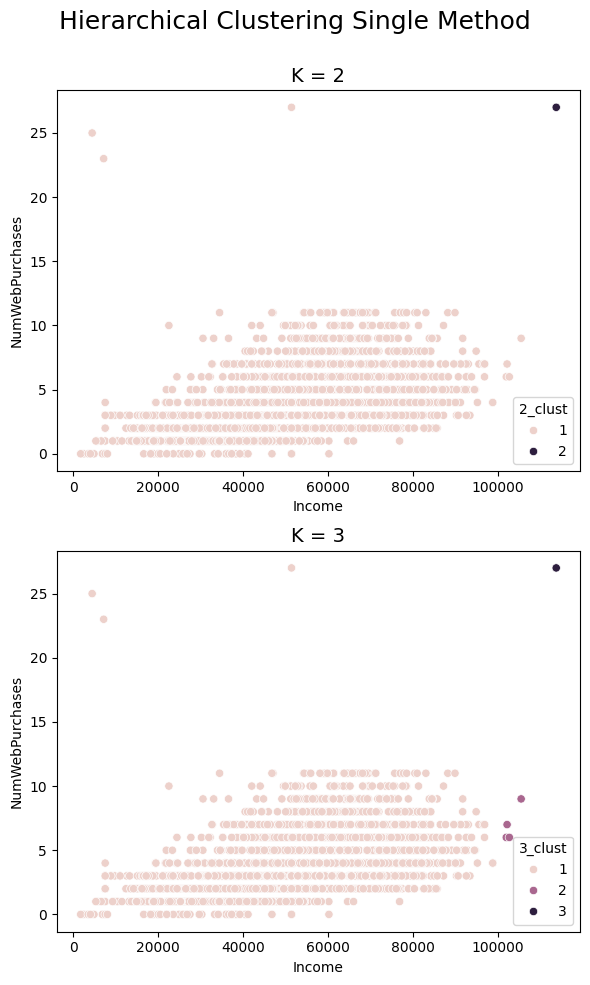

In [37]:
plt.figure(figsize=(6, 10))
plt.suptitle("Hierarchical Clustering Single Method", fontsize=18)

# K = 2
plt.subplot(2, 1, 1)
plt.title("K = 2", fontsize=14)
sns.scatterplot(
    x="Income", y="NumWebPurchases", data=X_labeled, hue="2_clust"
)

# K = 3
plt.subplot(2, 1, 2)
plt.title("K = 3", fontsize=14)
sns.scatterplot(
    x="Income", y="NumWebPurchases", data=X_labeled, hue="3_clust"
)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

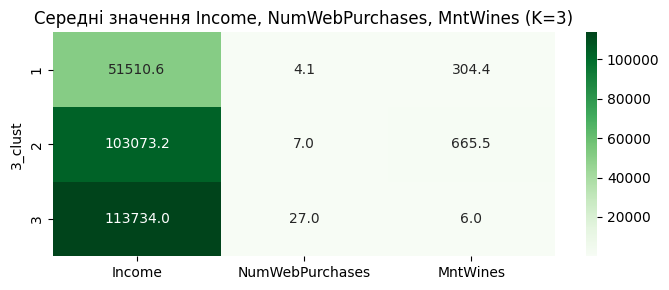

In [43]:
plt.figure(figsize=(7, 3))
sns.heatmap(
    X_labeled[['Income', 'NumWebPurchases', 'MntWines', '3_clust']].groupby('3_clust').mean(),
    cmap="Greens",
    annot=True,
    fmt=".1f"
)
plt.title("Середні значення Income, NumWebPurchases, MntWines (K=3)")
plt.tight_layout()
plt.show()

In [45]:
# Обчислення метрики силуету
silhouette_2 = silhouette_score(X_no_outliers, clusters_2)
silhouette_3 = silhouette_score(X_no_outliers, clusters_3)

print("Silhouette Score for K=2:", round(silhouette_2, 3))
print("Silhouette Score for K=3:", round(silhouette_3, 3))

Silhouette Score for K=2: 0.557
Silhouette Score for K=3: 0.451


**Поділ на два кластери:**

Основна маса користувачів — в одному кластері (кластер 1), лише кілька вийшли в окремий кластер.

**Поділ на три кластери:**

Вже бачимо розділення: середній, високий та дуже високий рівень доходу і покупок. Це кластеризація більш детальна, але деякі кластери мають мало об’єктів.

Кластер 1 — найменш платоспроможні користувачі: низький дохід і найменше покупок онлайн.

Кластер 2 — середній дохід, найбільше витрат на вино, трохи більше покупок.

Кластер 3 — високий дохід, дуже активні в онлайн-покупках, але майже не купують вино.

Згідно метрики силуету кращим є розділення все ж на 2 кластери.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

## Complete Linkage

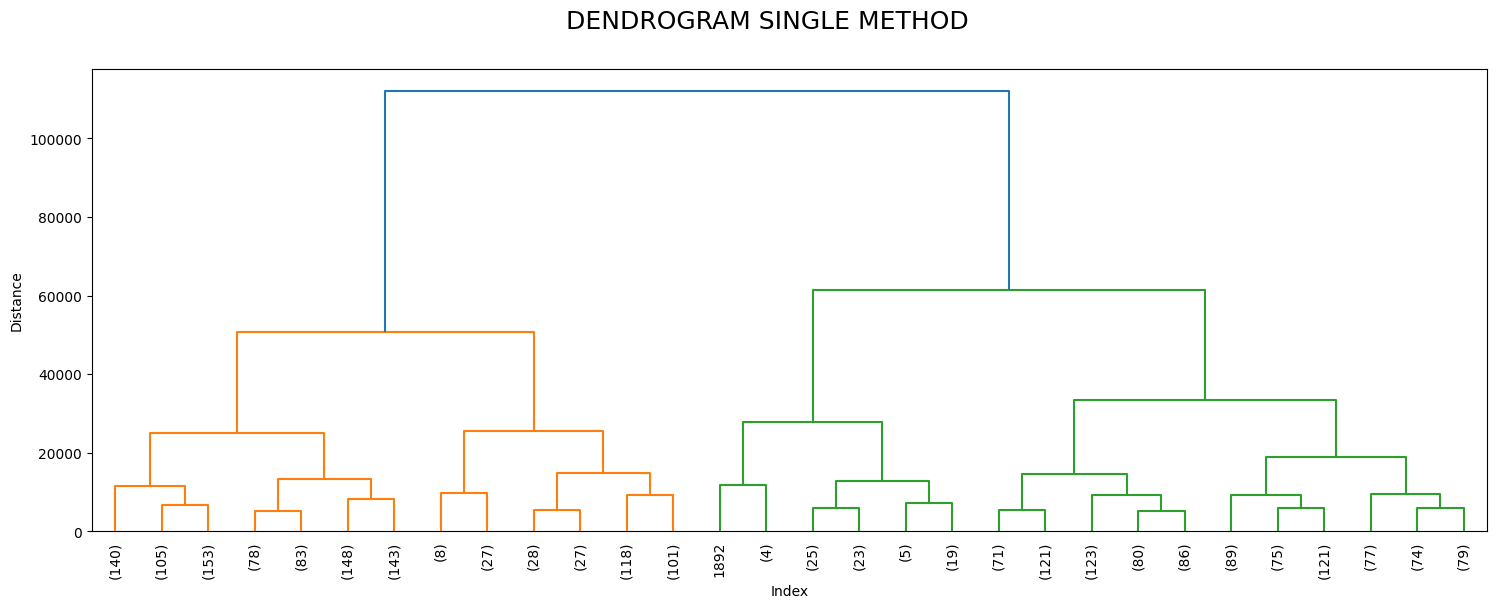

In [48]:
dist_comp = linkage(X_no_outliers, method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

In [55]:
# Плоска кластеризація на 2 та 3 кластери
clusters_2_CM = fcluster(dist_comp, t=2, criterion='maxclust')
clusters_3_CM = fcluster(dist_comp, t=3, criterion='maxclust')

X_labeled_comp = X_no_outliers.copy()
X_labeled_comp['2_clust'] = clusters_2_CM
X_labeled_comp['3_clust'] = clusters_3_CM

# К=2
fig_2d_both_2 = px.scatter(
    X_labeled_comp,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled_comp['2_clust'].astype(str),
    title="Flat Clustering (fcluster) with 2 Clusters - Complete Linkage",
    labels={"color": "2_clust"}
)

# К=3
fig_2d_both_3 = px.scatter(
    X_labeled_comp,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled_comp['3_clust'].astype(str),
    title="Flat Clustering (fcluster) with 3 Clusters - Complete Linkage",
    labels={"color": "3_clust"}
)

fig_2d_both_2.show()
fig_2d_both_3.show()

# Обчислення метрики силуету
silhouette_2_CM = silhouette_score(X_no_outliers, clusters_2_CM)
silhouette_3_CM = silhouette_score(X_no_outliers, clusters_3_CM)

print("Silhouette Score for K=2 (Complete Linkage):", round(silhouette_2_CM, 3))
print("Silhouette Score for K=3 (Complete Linkage):", round(silhouette_3_CM, 3))

Silhouette Score for K=2 (Complete Linkage): 0.603
Silhouette Score for K=3 (Complete Linkage): 0.493


## Ward Linkage

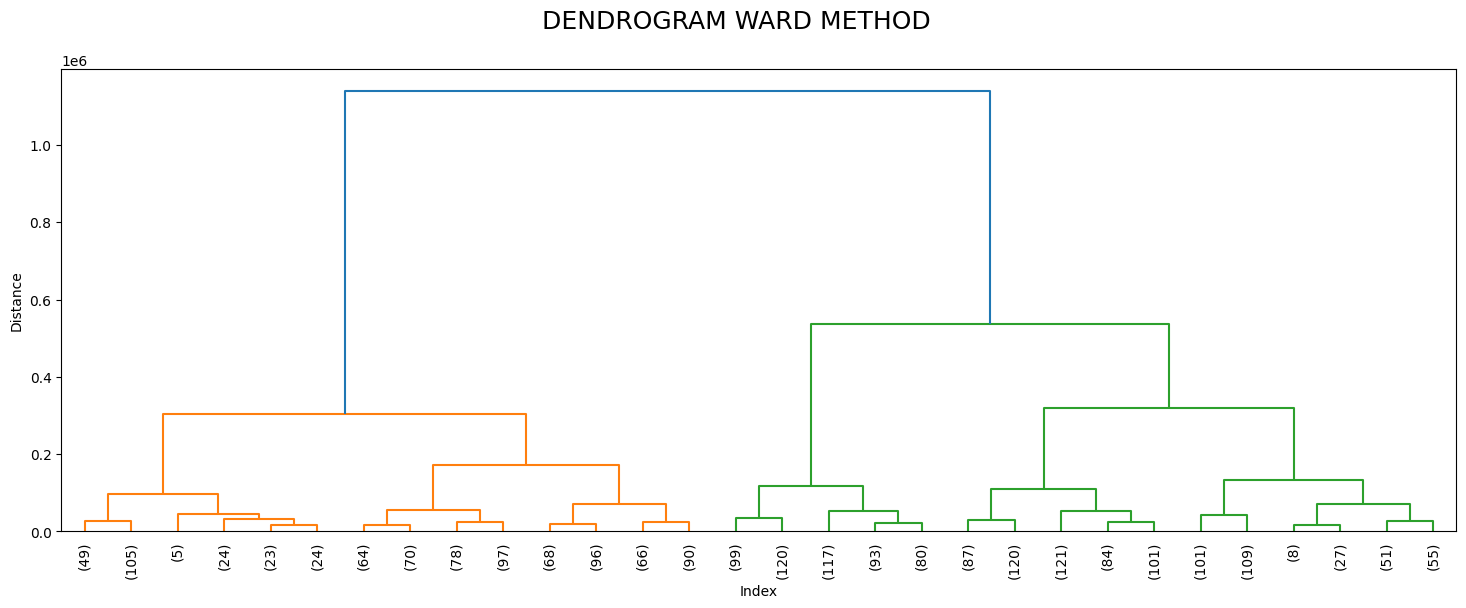

In [53]:
dist_ward = linkage(X_no_outliers, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_ward, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM WARD METHOD",fontsize=18)
plt.show()

In [56]:
# Плоска кластеризація на 2 та 3 кластери
clusters_2_W = fcluster(dist_ward, t=2, criterion='maxclust')
clusters_3_W = fcluster(dist_ward, t=3, criterion='maxclust')

X_labeled_ward = X_no_outliers.copy()
X_labeled_ward['2_clust'] = clusters_2_W
X_labeled_ward['3_clust'] = clusters_3_W

# К=2
fig_2d_both_2 = px.scatter(
    X_labeled_ward,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled_ward['2_clust'].astype(str),
    title="Flat Clustering (fcluster) with 2 Clusters - Ward Linkage",
    labels={"color": "2_clust"}
)

# К=3
fig_2d_both_3 = px.scatter(
    X_labeled_ward,
    x='Income',
    y='NumWebPurchases',
    color=X_labeled_ward['3_clust'].astype(str),
    title="Flat Clustering (fcluster) with 3 Clusters - Ward Linkage",
    labels={"color": "3_clust"}
)

fig_2d_both_2.show()
fig_2d_both_3.show()

# Обчислення метрики силуету
silhouette_2_W = silhouette_score(X_no_outliers, clusters_2_W)
silhouette_3_W = silhouette_score(X_no_outliers, clusters_3_W)

print("Silhouette Score for K=2 (Ward Linkage):", round(silhouette_2_W, 3))
print("Silhouette Score for K=3 (Ward Linkage):", round(silhouette_3_W, 3))

Silhouette Score for K=2 (Ward Linkage): 0.582
Silhouette Score for K=3 (Ward Linkage): 0.497


##BDSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [70]:
dbscan = DBSCAN(eps=1.6, min_samples=10)
dbscan.fit(X_scaled)
labels_DBS = dbscan.labels_
print(labels_DBS)

[-1 -1 -1 ... -1 -1 -1]


In [71]:
n_clusters_ = len(set(labels_DBS)) - (1 if -1 in labels_DBS else 0)

n_noise_ = list(labels_DBS).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X_unscaled, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters (DBSCAN): {s:.2f}')

Estimated number of clusters: 8
Estimated number of noise points: 1994
Silhouette Coefficient for the data Dataset Clusters (DBSCAN): -0.20


##Висновок

Complete linkage (K=2) демонструє найкращу якість кластеризації з найвищим Silhouette Score — 0.603, що вказує на чітко розділені кластери.

Ward linkage (K=2) також дає високий показник — 0.582, що робить його другою найкращою опцією.

Single linkage має найнижчі результати серед ієрархічних методів (0.557 та 0.451).

DBSCAN повністю провалився на цьому наборі — негативне значення Silhouette Score (−0.20) означає, що структура кластерів або випадкова, або непридатна до поточної конфігурації.